In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp

In [185]:
#Import data from csv file
filename = "mst-results.csv"
df = pd.read_csv(filename,sep=" ")
all_data = df.dropna()

#Remove outliers
all_data = all_data[(all_data["our_runtime"] <= 3000) & (all_data["kuskrall_time"] <= 3000)]


#Get subtables
complete_graph_data = all_data[all_data["graph_type"] == "complete_graph"]
cycle_graph_data = all_data[all_data["graph_type"] == "cycle_graph"]
random_graph_data = all_data[all_data["graph_type"] == "ramdom_graph"]

all_data

,graph_type,node_size,weight_distribution,max_weight,max_read,our_runtime,kuskrall_time,groundtruth,approximation,error
0,ramdom_graph,1000,random_weights,1,100,0.003829,0.017036,999.0,999.0,0.000000
1,ramdom_graph,1000,random_weights,1,1000,0.055851,0.011343,999.0,999.0,0.000000
4,ramdom_graph,1000,random_weights,10,100,0.002410,0.010175,3241.0,2996.0,8.177570
5,ramdom_graph,1000,random_weights,10,1000,0.096031,0.009526,3197.0,3155.0,1.331220
8,ramdom_graph,1000,random_weights,100,100,0.014899,0.010416,28072.0,23954.0,17.191283
...,...,...,...,...,...,...,...,...,...,...
633,complete_graph,10000,skew_normal,100,1000,10.867942,447.803420,489950.0,329967.0,48.484545
634,complete_graph,10000,skew_normal,100,10000,10.686621,503.267169,489951.0,369951.0,32.436728
636,complete_graph,10000,skew_normal,1000,100,8.926950,1464.508878,4989499.0,9999.0,49799.979998
637,complete_graph,10000,skew_normal,1000,1000,8.937484,1474.227430,4989498.0,9999.0,49799.969997


# Plot ideas
- Incresing runtime performance: Three plots -> graph type, with four ticks for each node size = average of runtime + variance -> OURS + kruskal
- Approximation, groundtruth and error for all four graph types and node sizes
- Skatterplot approximation and groundtruth

- How effects graph type ...
- How effects node size ...
- How effects Weight distribution ...
- How effects Max weight ...
- How effects Max Read performance.

- Accumulative plots


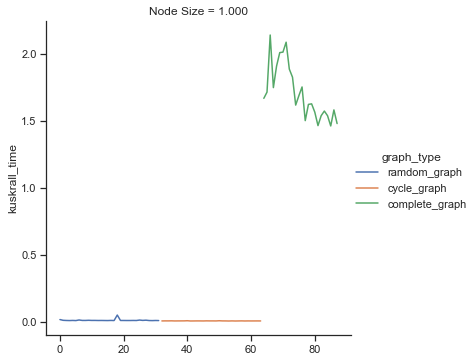

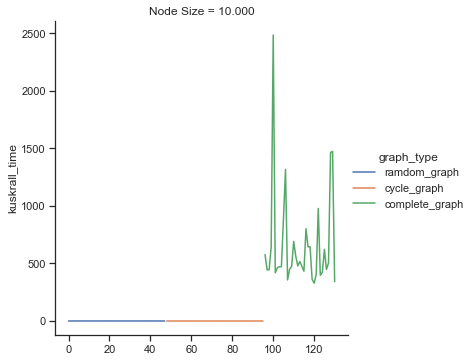

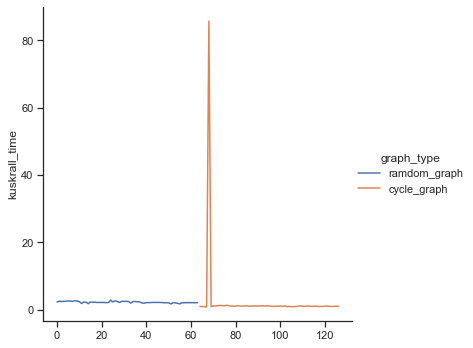

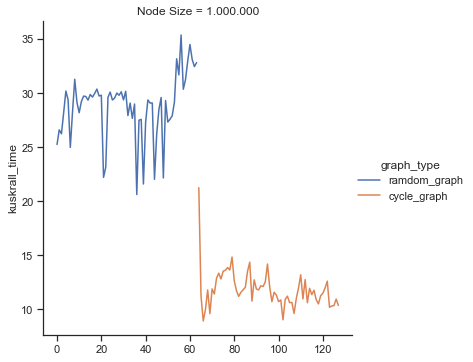

In [190]:
data = all_data[(all_data["node_size"] == 1000)]
sns.relplot(x=range(len(data)), y="kuskrall_time", hue="graph_type", kind="line", ci="sd", data=data);
plt.title("Node Size = 1.000")
plt.savefig("kruskall_node1000_graphtype.png")

data = all_data[(all_data["node_size"] == 10000)]
sns.relplot(x=range(len(data)), y="kuskrall_time", hue="graph_type", kind="line", ci="sd", data=data);
plt.title("Node Size = 10.000")
plt.savefig("kruskall_node10000_graphtype.png")

data = all_data[(all_data["node_size"] == 100000)]
sns.relplot(x=range(len(data)), y="kuskrall_time", hue="graph_type", kind="line", ci="sd", data=data);
plt.savefig("kruskall_node100000_graphtype")

data = all_data[(all_data["node_size"] == 1000000)]
sns.relplot(x=range(len(data)), y="kuskrall_time", hue="graph_type", kind="line", ci="sd", data=data);
plt.title("Node Size = 1.000.000")
plt.savefig("kruskall_node1000000_graphtype")



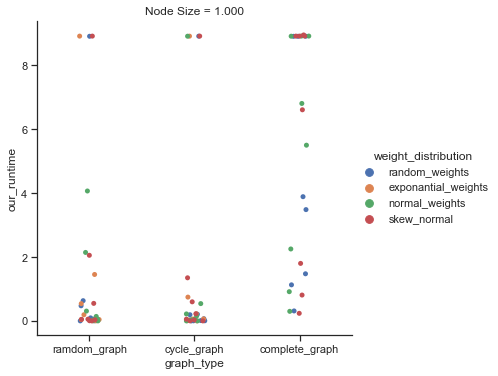

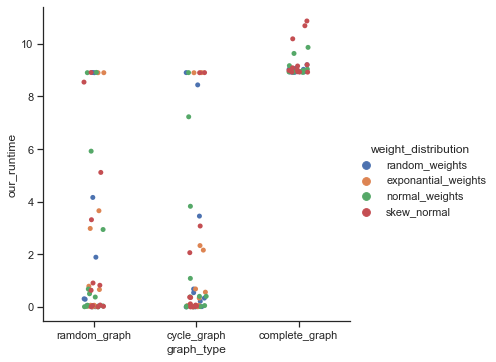

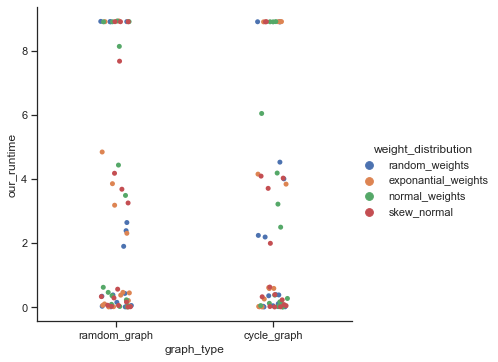

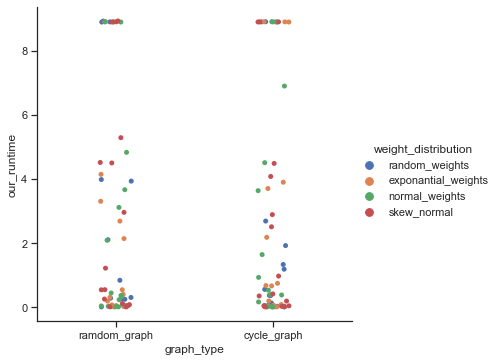

In [193]:
sns.set_theme(style="ticks", color_codes=True)

data = all_data[(all_data["our_runtime"] <= 3000) & (all_data["node_size"] == 1000)]
sns.catplot(x="graph_type", y="our_runtime", hue="weight_distribution", data=data)
plt.title('Node Size = 1.000')
plt.savefig("ourruntime_node1000_wdistro.png")

data = all_data[(all_data["our_runtime"] <= 3000) & (all_data["node_size"] == 10000)]
sns.catplot(x="graph_type", y="our_runtime", hue="weight_distribution", data=data)
plt.savefig("ourruntime_node10000_wdistro.png")


data = all_data[(all_data["our_runtime"] <= 3000) & (all_data["node_size"] == 100000)]
sns.catplot(x="graph_type", y="our_runtime", hue="weight_distribution", data=data)
plt.savefig("ourruntime_node100000_wdistro.png")


data = all_data[(all_data["our_runtime"] <= 3000) & (all_data["node_size"] == 1000000)]
sns.catplot(x="graph_type", y="our_runtime", hue="weight_distribution", data=data)
plt.savefig("ourruntime_node1000000_wdistro.png")


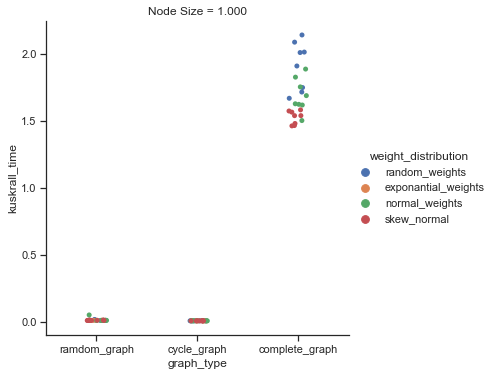

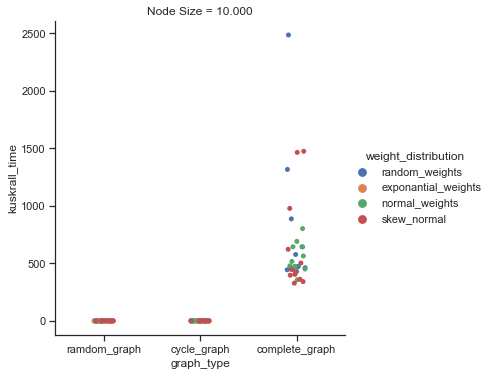

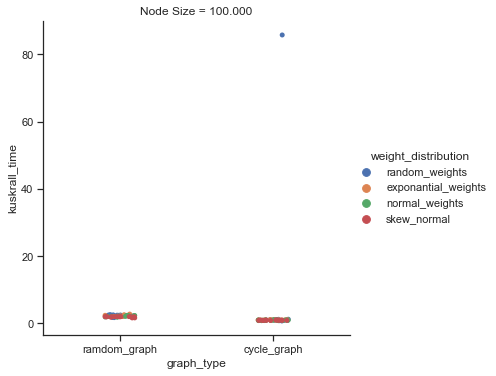

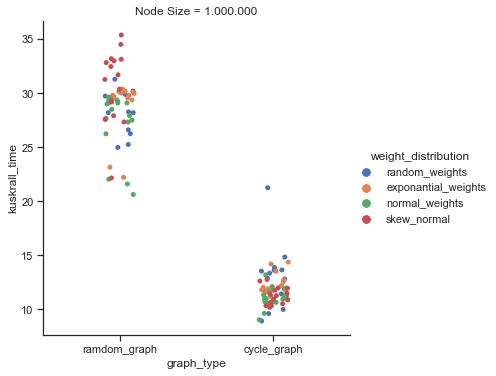

In [192]:
sns.set_theme(style="ticks", color_codes=True)

data = all_data[(all_data["node_size"] == 1000)]
sns.catplot(x="graph_type", y="kuskrall_time", hue="weight_distribution", data=data)
plt.title('Node Size = 1.000')
plt.savefig("kuskrall_node1000_wdistro.png")


data = all_data[(all_data["node_size"] == 10000)]
sns.catplot(x="graph_type", y="kuskrall_time", hue="weight_distribution", data=data)
plt.title('Node Size = 10.000')
plt.savefig("kuskrall_node10000_wdistro.png")


data = all_data[(all_data["node_size"] == 100000)]
sns.catplot(x="graph_type", y="kuskrall_time", hue="weight_distribution", data=data)
plt.title('Node Size = 100.000')
plt.savefig("kuskrall_node100000_wdistro.png")


data = all_data[(all_data["node_size"] == 1000000)]
sns.catplot(x="graph_type", y="kuskrall_time", hue="weight_distribution", data=data)
plt.title('Node Size = 1.000.000')
plt.savefig("kuskrall_node1000000_wdistro.png")
